In [28]:
import os.path
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import ImageFont
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
print('Shape of the Dataset')
print('==================================')
print('X_train Shape: {}'.format(X_train.shape))
print('-------------------------------------')
print('X_test Shape: {}'.format(X_test.shape))
print('-------------------------------------')
print('Y_train Samples: {}'.format(Y_train.shape[0]))
print('-------------------------------------')
print('Y_test Samples: {}'.format(Y_test.shape[0]))

Shape of the Dataset
X_train Shape: (50000, 32, 32, 3)
-------------------------------------
X_test Shape: (10000, 32, 32, 3)
-------------------------------------
Y_train Samples: 50000
-------------------------------------
Y_test Samples: 10000


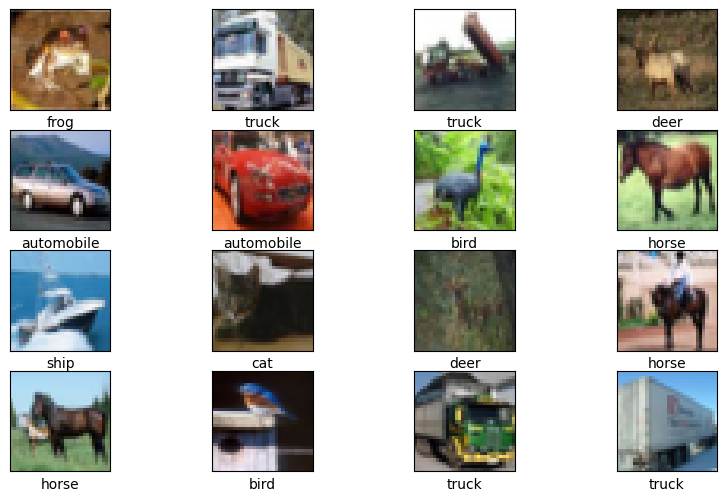

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [6]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train = to_categorical(Y_train,10)
Y_test= to_categorical(Y_test,10)

In [7]:
# Model_3 with Batch Normalization
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [10]:
# adam = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

rms = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=rms, metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train, batch_size = 64, epochs = 50, verbose=1, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/50
782/782 [==============================] - 36s 39ms/step - loss: 2.1939 - accuracy: 0.3340 - val_loss: 1.4393 - val_accuracy: 0.4861
Epoch 2/50
782/782 [==============================] - 30s 38ms/step - loss: 1.5302 - accuracy: 0.4879 - val_loss: 1.7792 - val_accuracy: 0.4663
Epoch 3/50
782/782 [==============================] - 30s 38ms/step - loss: 1.2291 - accuracy: 0.5740 - val_loss: 1.1244 - val_accuracy: 0.6034
Epoch 4/50
782/782 [==============================] - 30s 38ms/step - loss: 1.0513 - accuracy: 0.6375 - val_loss: 0.9666 - val_accuracy: 0.6654
Epoch 5/50
782/782 [==============================] - 30s 38ms/step - loss: 0.9166 - accuracy: 0.6806 - val_loss: 0.8503 - val_accuracy: 0.7012
Epoch 6/50
782/782 [==============================] - 30s 38ms/step - loss: 0.8176 - accuracy: 0.7172 - val_loss: 0.7869 - val_accuracy: 0.7315
Epoch 7/50
782/782 [==============================] - 30s 38ms/step - loss: 0.7383 - accuracy: 0.7443 - val_loss: 0.7707 - val_accuracy:

In [13]:
save_dir = os.path.join(os.getcwd(),'saved_models')
model_name='CIFAR_10_rms.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved training model is %s' %model_path)

Saved training model is C:\Acmegrade\Image Recognition CIFAR-10\saved_models\CIFAR_10_rms.h5


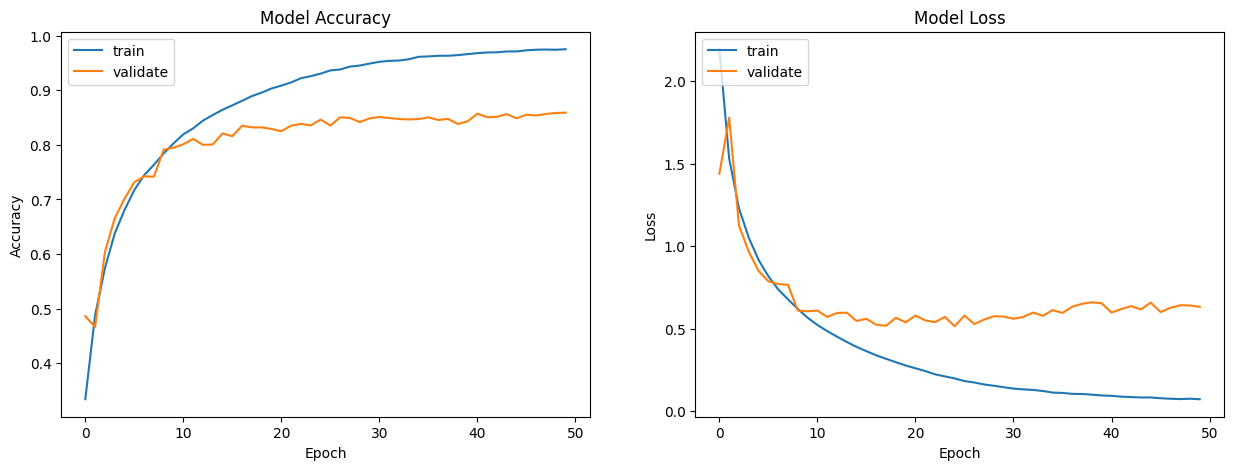

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

In [54]:
from keras.models import load_model
model = load_model('saved_models/CIFAR_10_rms.h5')

In [55]:
scores = model.evaluate(X_test, Y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.6325 - accuracy: 0.8590
Test loss: 0.6325319409370422
Test accuracy: 0.859000027179718


In [56]:
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

pred = model.predict(X_test)

Y_pred_classes = np.argmax(pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
errors = (Y_pred_classes - Y_true !=0)

313/313 [==============================] - 3s 9ms/step


In [58]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       0.95      0.93      0.94      1000
           2       0.85      0.78      0.81      1000
           3       0.76      0.70      0.73      1000
           4       0.81      0.87      0.84      1000
           5       0.78      0.80      0.79      1000
           6       0.89      0.92      0.90      1000
           7       0.88      0.90      0.89      1000
           8       0.90      0.93      0.91      1000
           9       0.88      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



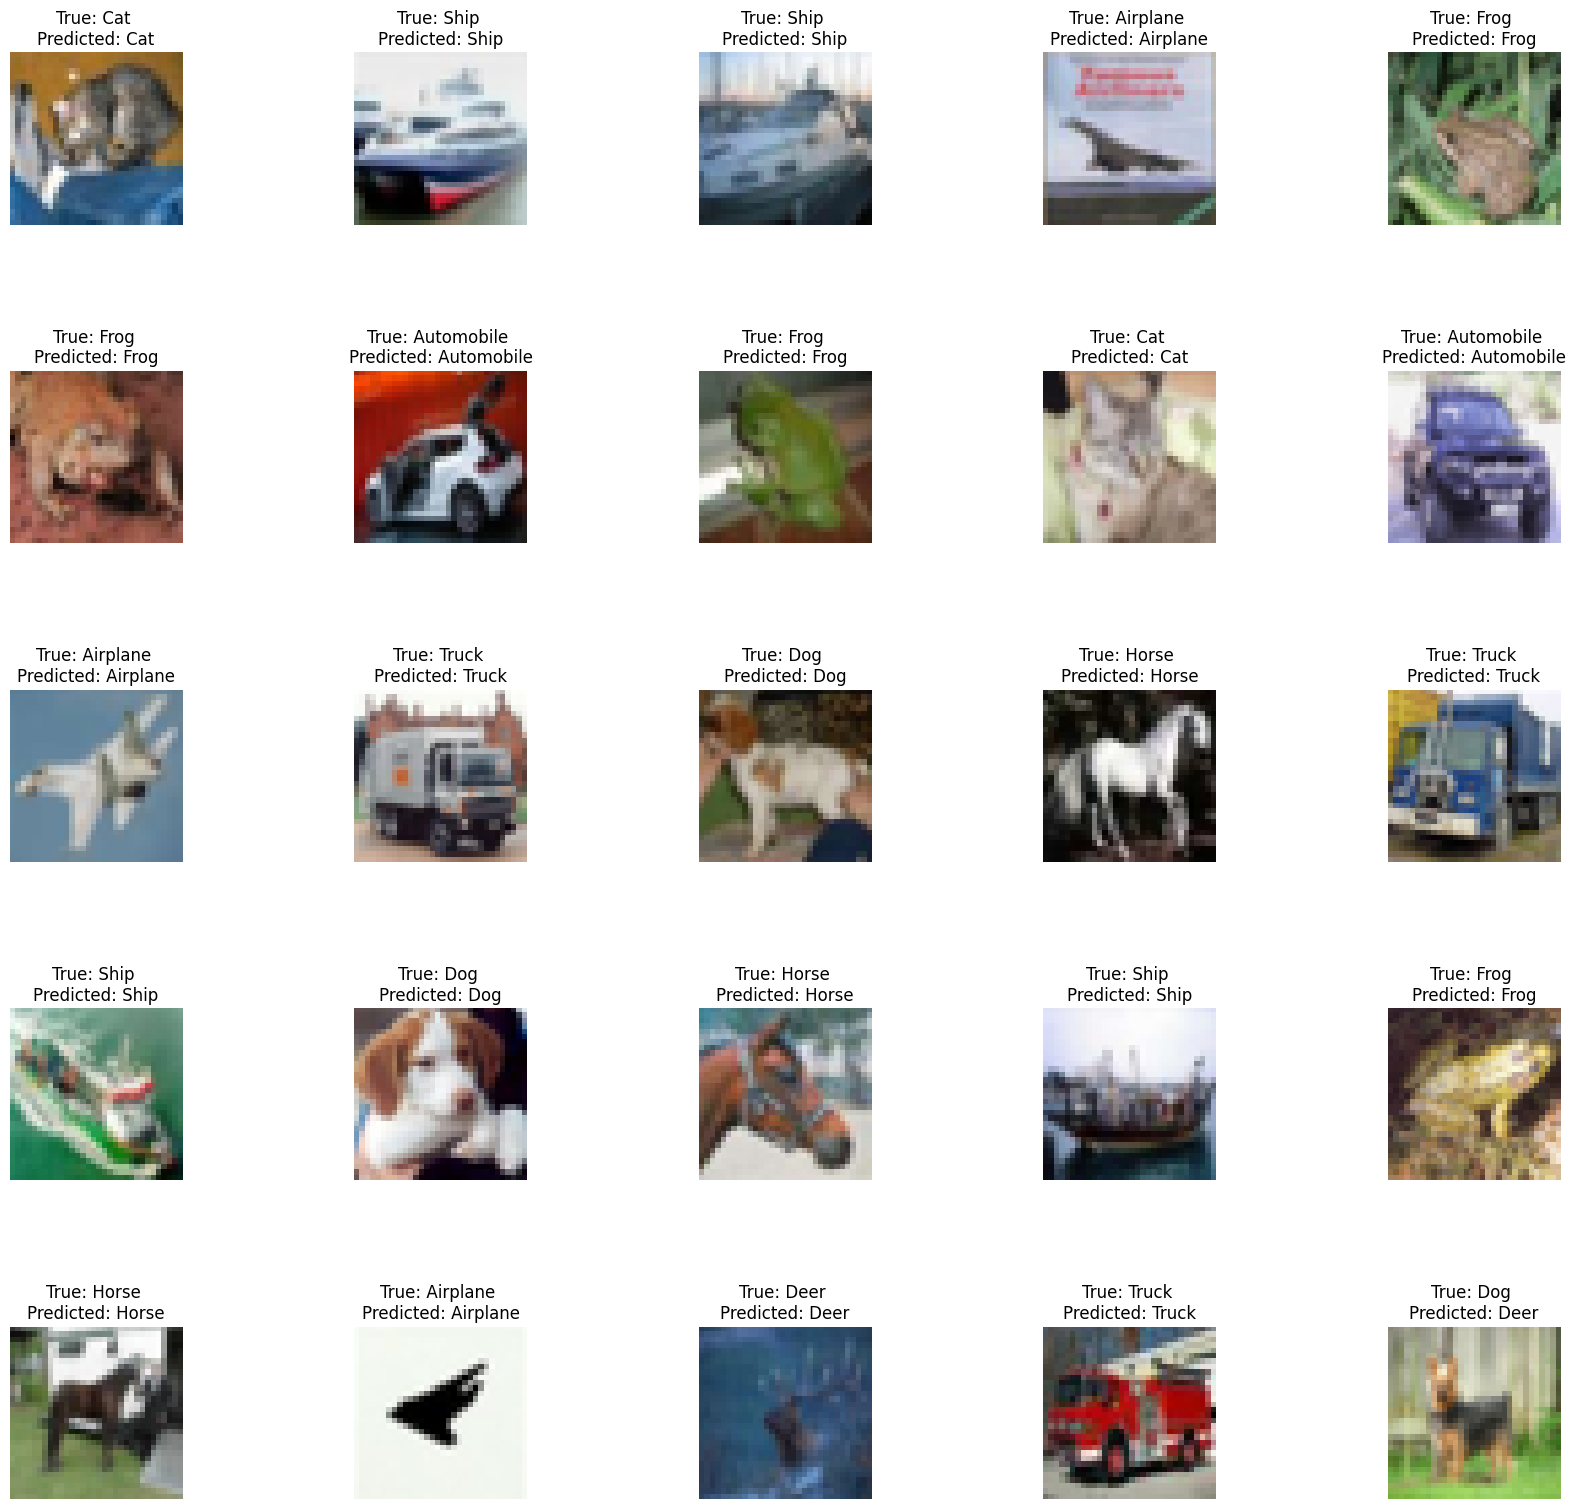

In [59]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredicted: %s" %(labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [60]:
def show_test(number):
    fig = plt.figure(figsize=(3, 3))
    test_image = np.expand_dims(X_test[number], axis=0)
    # Get the predicted probabilities for each class
    probabilities = model.predict(test_image)
    # Get the class label with the highest probability
    predicted_class = np.argmax(probabilities)
    
    plt.imshow(X_test[number])
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[predicted_class], labels[Y_true[number]]))

In [67]:
def show_test_random():
  # Get a random integer within the length of the test set
  random_index = np.random.randint(0, len(X_test))
  
  # Call the original show_test function with the random index
  show_test(random_index)

1/1 [==============================] - 0s 25ms/step


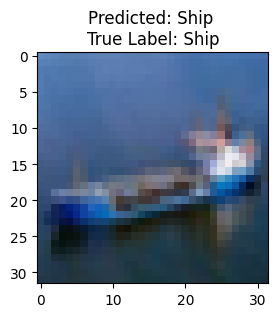

In [69]:
show_test_random()

In [ ]:
|